#   Data Dictionary

    
    
    FEATURES          DESCRIPTION
    
    District Name :   Name of the Districts in Western Maharashtra.
    Soil color    :   Colors of soil present in Specific Districts .
    Nitrogen      :   value of Nitrogen rate
    Potassium     :   value of Potassium rate
    Phosphorus    :   value of Phosphorus
    pH            :   pH rate
    Rainfall      :   rainfall rate
    Temperature   :   rate of Temperature
    Crop          :   various crop names
    Fertilizer    :   Name of fertilizer suitable to crop





![title](crop and fertilizer image.jpg)

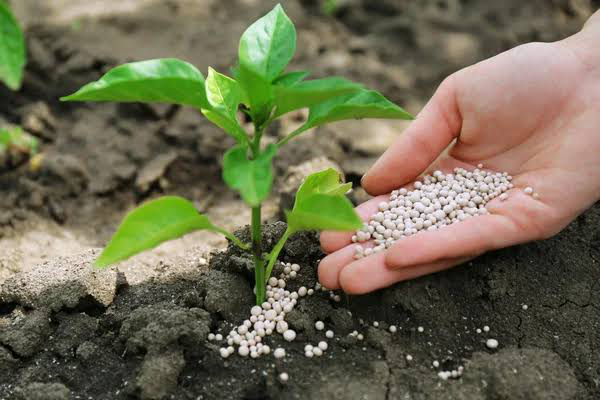

In [1]:
#IMPORTING THE IMAGE FOR BETTER PRESENTATION

from PIL import Image

img = Image.open('crop and fertilizer image.jpg')
img

In [2]:
#IMPORTING THE PYTHON LIBRARIES

import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

#IMPORTING CLASSES

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [3]:
#LOADING THE DATASET

df = pd.read_csv(r"C:\Users\Ritika Kumari\Downloads\archive (21)\Crop and fertilizer dataset.csv")
print("SHAPE : " , df.shape)

SHAPE :  (4513, 11)


# GETTING INFORMATION ABOUT THE DATASET

In [4]:
#CHECKING THE DATATYPE 

df.dtypes

District_Name     object
Soil_color        object
Nitrogen           int64
Phosphorus         int64
Potassium          int64
pH               float64
Rainfall           int64
Temperature        int64
Crop              object
Fertilizer        object
Link              object
dtype: object

In [5]:
#DISPLAYING THE TOP HEAD VALUES

df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


WE WILL DELETE THE COLUMN HAVING YOUTUBE LINK 

In [6]:
#DELETING THE COLUMN HAVING YOUTUBE LINK

df = df.drop(columns = 'Link')

In [7]:
#NOW CHECKING THE HEAD VALUES

df

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea
...,...,...,...,...,...,...,...,...,...,...
4508,Pune,Black,130,80,150,7.0,1400,30,Sugarcane,MOP
4509,Pune,Black,135,80,150,7.0,1400,30,Sugarcane,MOP
4510,Pune,Black,140,80,150,7.0,1400,30,Sugarcane,MOP
4511,Pune,Black,145,80,150,7.0,1400,30,Sugarcane,MOP


In [7]:
#DISPLAYING ALL COLUMNS AND ROWS


pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [8]:
#GETTING THE INFO. OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 352.7+ KB


# CHECKING FOR MISSING VALUES

In [9]:
#CHECKING THE NULL VALUES IN ALL THE COLUMNS

df.isnull().sum()

District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
dtype: int64

In [10]:
#FINDING THE SUM OF OVERALL NULL VALUES

df.isnull().sum().sum()

0

<AxesSubplot:>

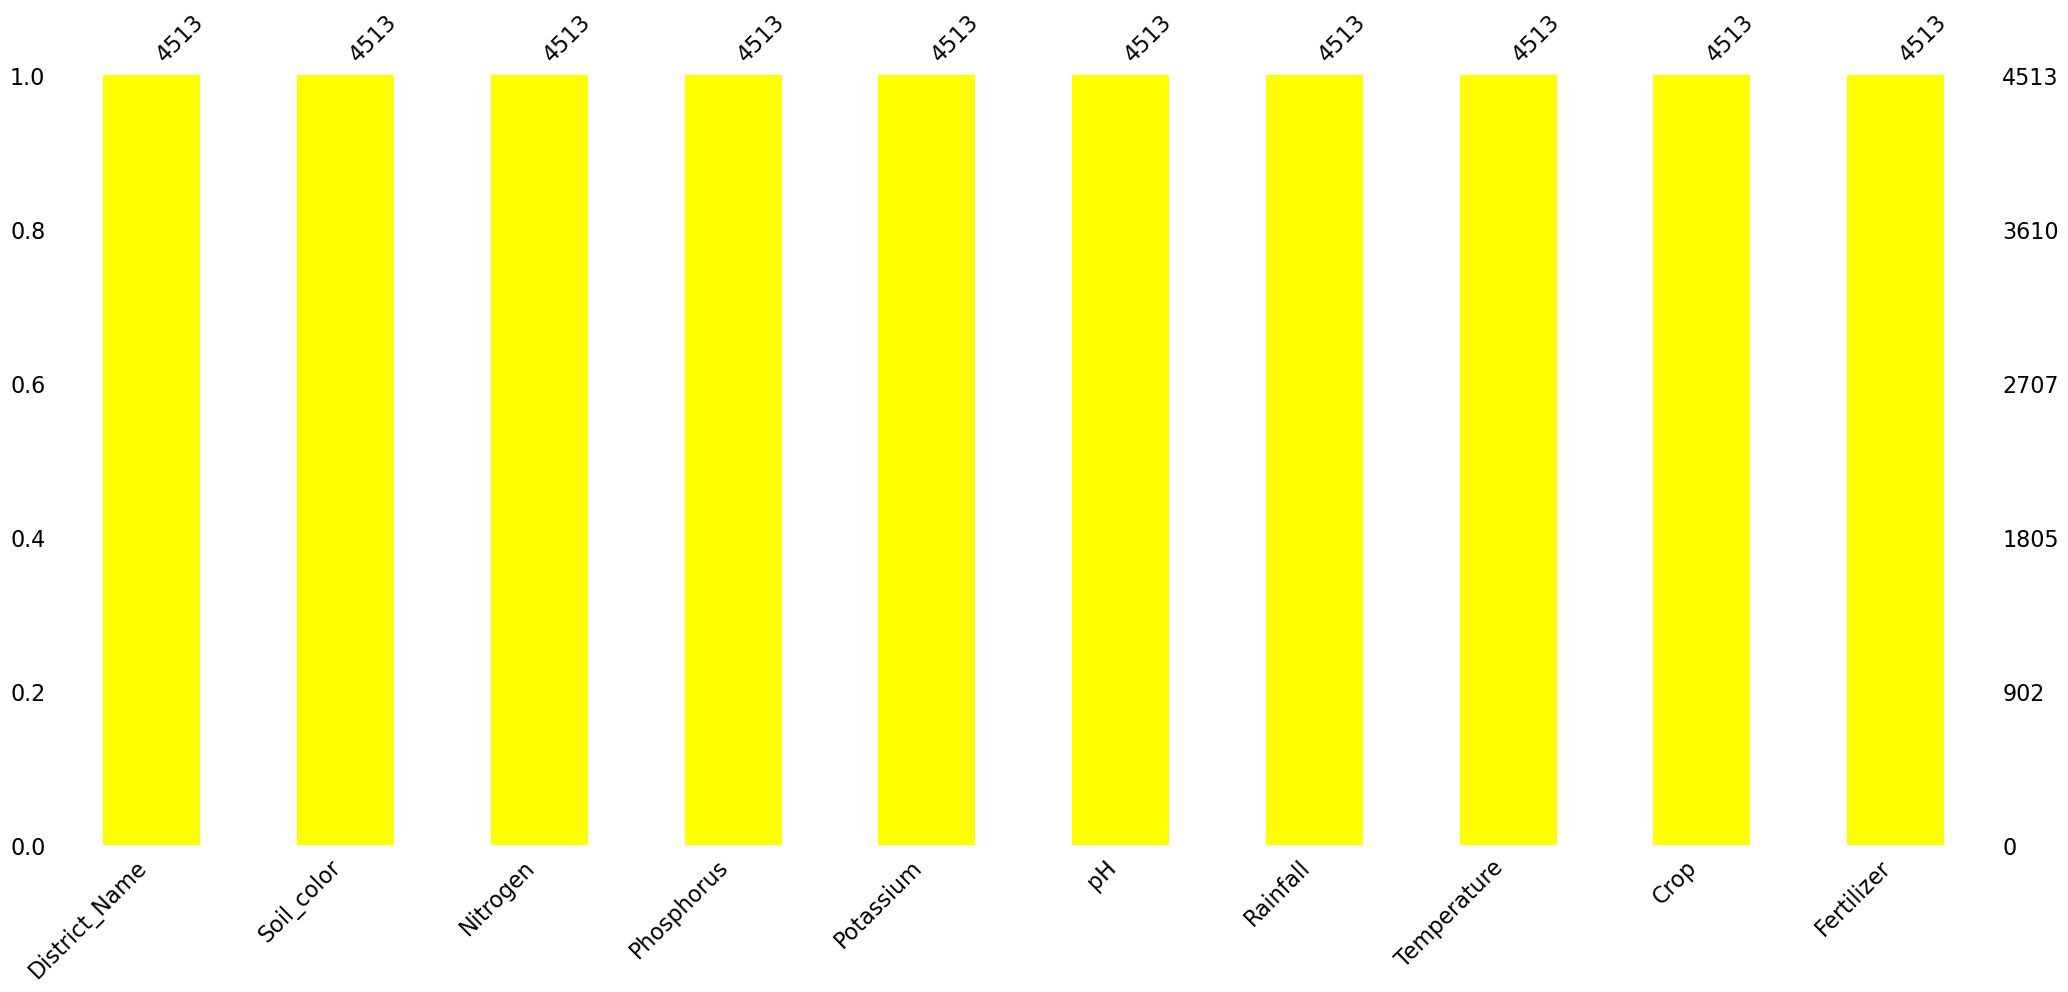

In [11]:
#THIS BARCHART WOULD GIVE US AN IDEA ABOUT HOW MANY MISSING VALUES ARE PRESENT IN EACH COLUMN


msno.bar(df,color='yellow')

In [12]:
#GETTING ALL THE NUMERICAL FEATURES


num_var = df.select_dtypes(include=['int64','float64']).keys()
num_var

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature'], dtype='object')

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

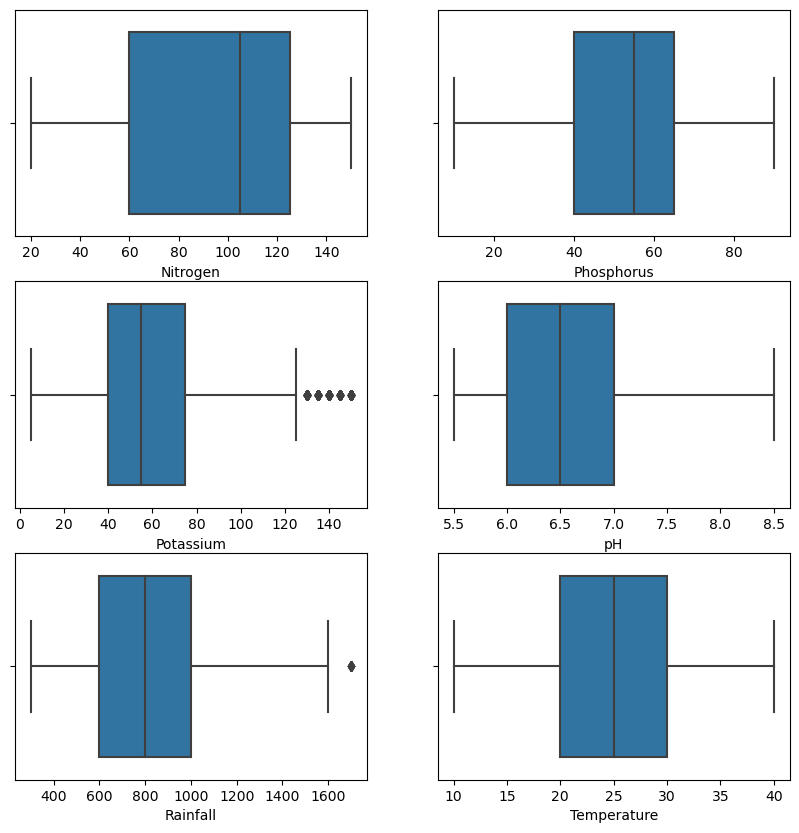

In [13]:
#PLOTTING BOXPLOT TO CHECK VISUALISE OUTLIERS(IF ANY) IN THE DATAFRAME


num_var =['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']


plt.figure(figsize=(10,10))
for i , var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[var])

In [14]:
#LISTING OUTLIERS

out_liers = ['Potassium']

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


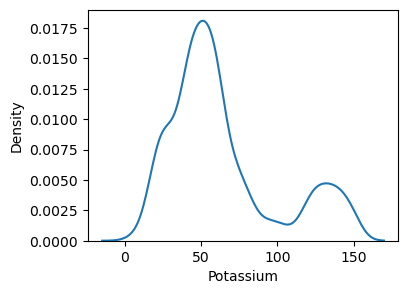

In [15]:
#PLOTTING THE DISTRIBUTION PLOT

plt.figure(figsize = (4,3))
sns.distplot(df['Potassium'],hist=False)
plt.show()

IT IS HAVING A SKEWED DISTRIBUTION,THERE WE WILL BE USING IQR METHOD TO HANDLE OUTLIER

# IQR METHOD

In [16]:
#SORTING THE SELECTED FEATURE

df['Potassium'] = sorted(df['Potassium'])

In [17]:
#FINDING THE q1,q2,iqr AND PRINTING IT

q1 = df['Potassium'].quantile(0.25)
q3 = df['Potassium'].quantile(0.75)
iqr = q3 - q1

print("--------------------------")
print("--------------------------")
print("q1 of Potassium : " , q1)
print("q3 of Potassium : " , q3)
print("iqr of Potassium : " , iqr)
print("--------------------------")
print("--------------------------")

--------------------------
--------------------------
q1 of Potassium :  40.0
q3 of Potassium :  75.0
iqr of Potassium :  35.0
--------------------------
--------------------------


In [18]:
#FINDING THE UPPER AND LOWER LIMITS OF THE FEATURE


upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

print(" ")
print("upper_limit of potassium : " , upper_limit)
print(" ")
print("lower_limit of potassium : " , lower_limit)
print(" ")

 
upper_limit of potassium :  127.5
 
lower_limit of potassium :  -12.5
 


In [19]:
#CAPPING : changing the outliers to upper and lower limits
#MAKING A COPY OF THE DATAFRAME


df_cap = df.copy()

def cap_out_lier(var,upper_limit,lower_limit):
    df_cap['Potassium']=np.where(
    df_cap['Potassium']>upper_limit,
    upper_limit,
    np.where(
    df_cap['Potassium']<lower_limit,
    lower_limit,
    df_cap['Potassium']))
    


    
cap_out_lier("Potassium",  127.5 ,-12.5)

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potassium'>

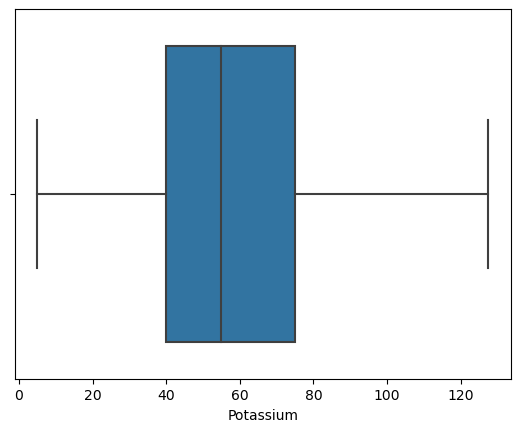

In [20]:
#PLOTTING BOXPLOT AFTER THE OUTLIER REMOVAL

sns.boxplot(df_cap['Potassium'])

THE OUTLIER IS HANDLED SUCCESSFULLY!!

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potassium'>

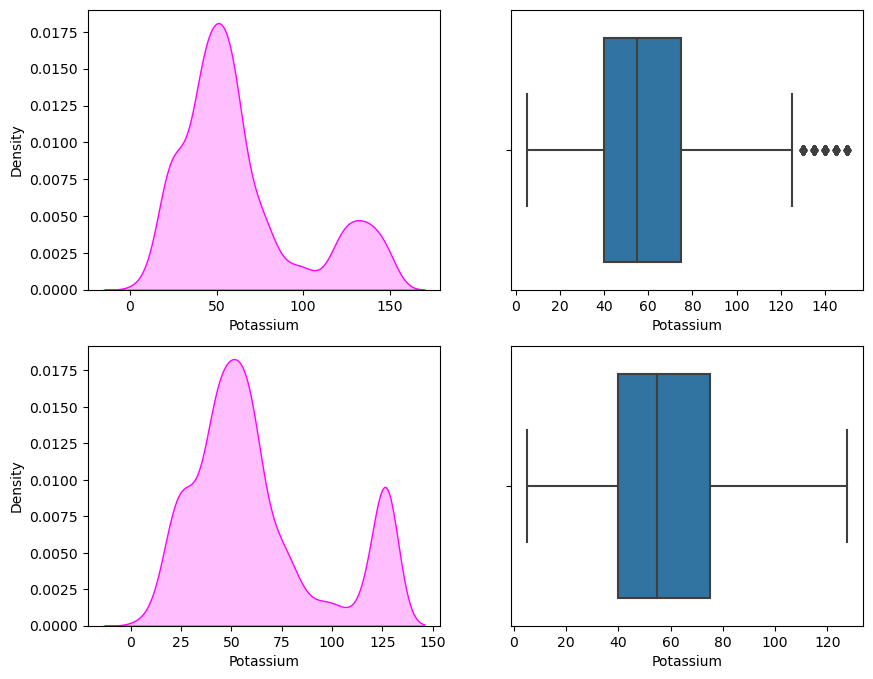

In [55]:
#COMPARING BETWEEN THE DISTRIBUTION BEFORE AND AFTER REMOVING OUTLIERS


plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.kdeplot(df['Potassium'],color='magenta',shade = True)
plt.subplot(2,2,2)
sns.boxplot(df['Potassium'])
plt.subplot(2,2,3)
sns.kdeplot(df_cap['Potassium'],color='magenta',shade = True)
plt.subplot(2,2,4)
sns.boxplot(df_cap['Potassium'])


<AxesSubplot:xlabel='Potassium', ylabel='Density'>

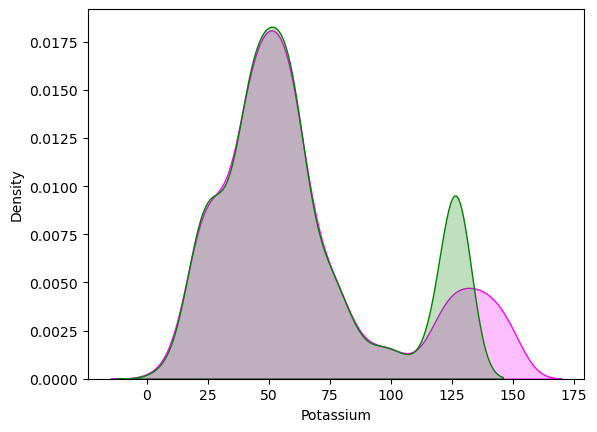

In [57]:
#USING KDEPLOT TO COMPARE THE DISTRIBUTION BEFORE AND AFTER REMOVING OUTLIER

sns.kdeplot(df['Potassium'],color='magenta',shade = True)
sns.kdeplot(df_cap['Potassium'],color='green',shade = True)

THERE IS NOT MUCH CHANGE IN THE DISTRIBUTION BEFORE AND AFTER REMOVING OUTLIERS.

# EXPLORATORY DATA ANALYSIS

In [23]:
df_cap.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Kolhapur,Black,75,50,5.0,6.5,1000,20,Sugarcane,Urea
1,Kolhapur,Black,80,50,5.0,6.5,1000,20,Sugarcane,Urea
2,Kolhapur,Black,85,50,5.0,6.5,1000,20,Sugarcane,Urea
3,Kolhapur,Black,90,50,5.0,6.5,1000,20,Sugarcane,Urea
4,Kolhapur,Black,95,50,5.0,6.5,1000,20,Sugarcane,Urea


C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature'>

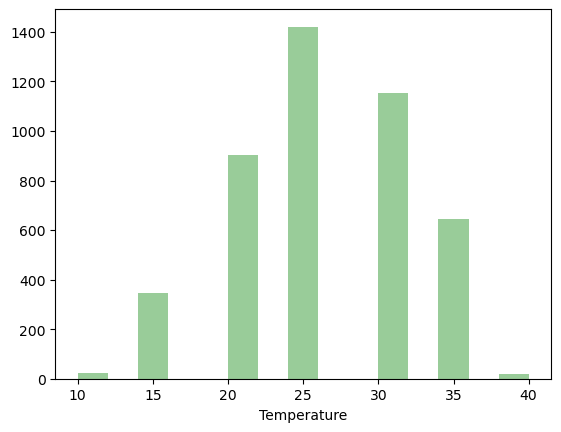

In [24]:
#PLOTTING DISTRIBUTION PLOT OF TEMPERATURE

sns.distplot(df_cap['Temperature'] , color = 'green',kde = False , bins=15)

FROM THE ABOVE GRAPH IT CAN BE CONCLUDED THAT MAJORITY OF THE PLACES ARE HAVING TEMPERATURE BETWEEN (20-30) DEGREE CELCIUS.THIS TEMPERATURE RANGE IS OPTIMAL FOR GERMINATION OF SEEDS OF MOST OF THE CROPS.

<AxesSubplot:xlabel='District_Name', ylabel='Crop'>

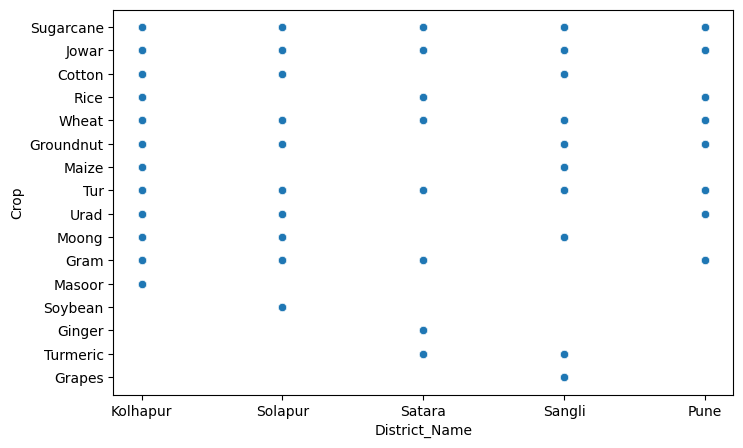

In [25]:
#FINDING THE RELATION BETWEEN NAME OF THE DISRICTS AND THE CROPS GROWN
#USING SCATTER PLOT

plt.figure(figsize = (8,5))

sns.scatterplot(x = 'District_Name' , y = 'Crop' , data = df_cap)

FROM THIS GRAPH IT CAN BE CONCLUDED THAT PUNE GROWS THE MINIMUN NUMBER OF CROPS AND KOLHAPUR GROWS THE MAXIMUM OF IT.

<AxesSubplot:xlabel='Crop', ylabel='count'>

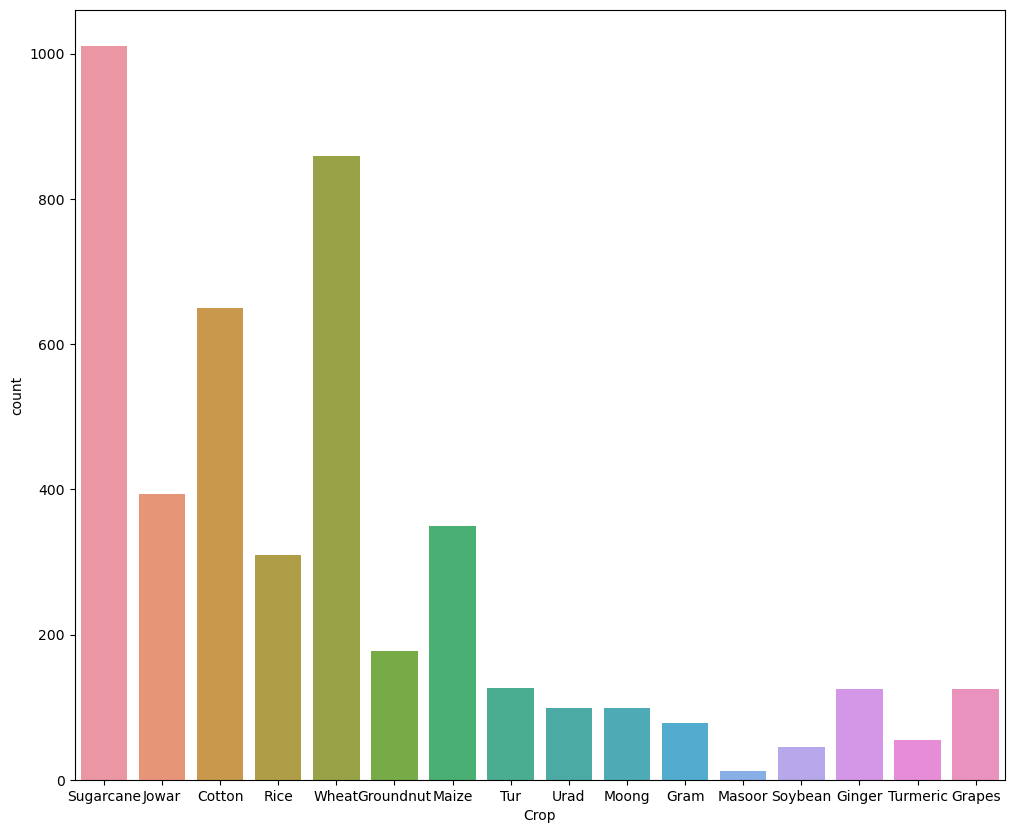

In [26]:
#CHECKING THE WEIGHTAGE OF EACH CROP
#USING COUNTPLOT


plt.figure(figsize = (12,10))
sns.countplot(x = 'Crop' , data = df_cap)

ACCORDING TO THIS GRAPH THE TOP 3 CROPS THAT ARE GROWN IS : " Sugarcane " , " Cotton " , " Wheat "

<AxesSubplot:xlabel='Soil_color', ylabel='count'>

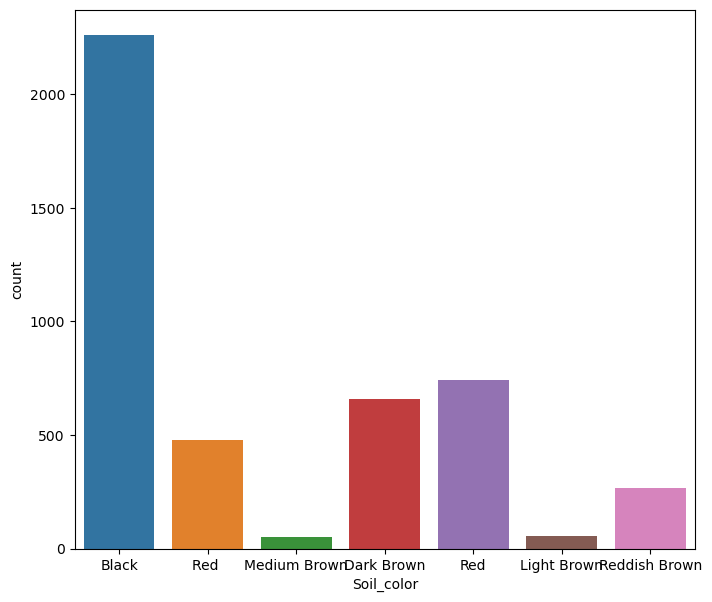

In [27]:
#CHECKING THE WEIGHTAGE OF SOIL COLOR
#USING COUNTPLOT


plt.figure(figsize = (8,7))
sns.countplot(x = 'Soil_color' , data = df_cap)

ACCORDING TO THIS GRAPH : MAJORITY OF SOIL IS BALCK SOIL

<AxesSubplot:xlabel='Fertilizer', ylabel='count'>

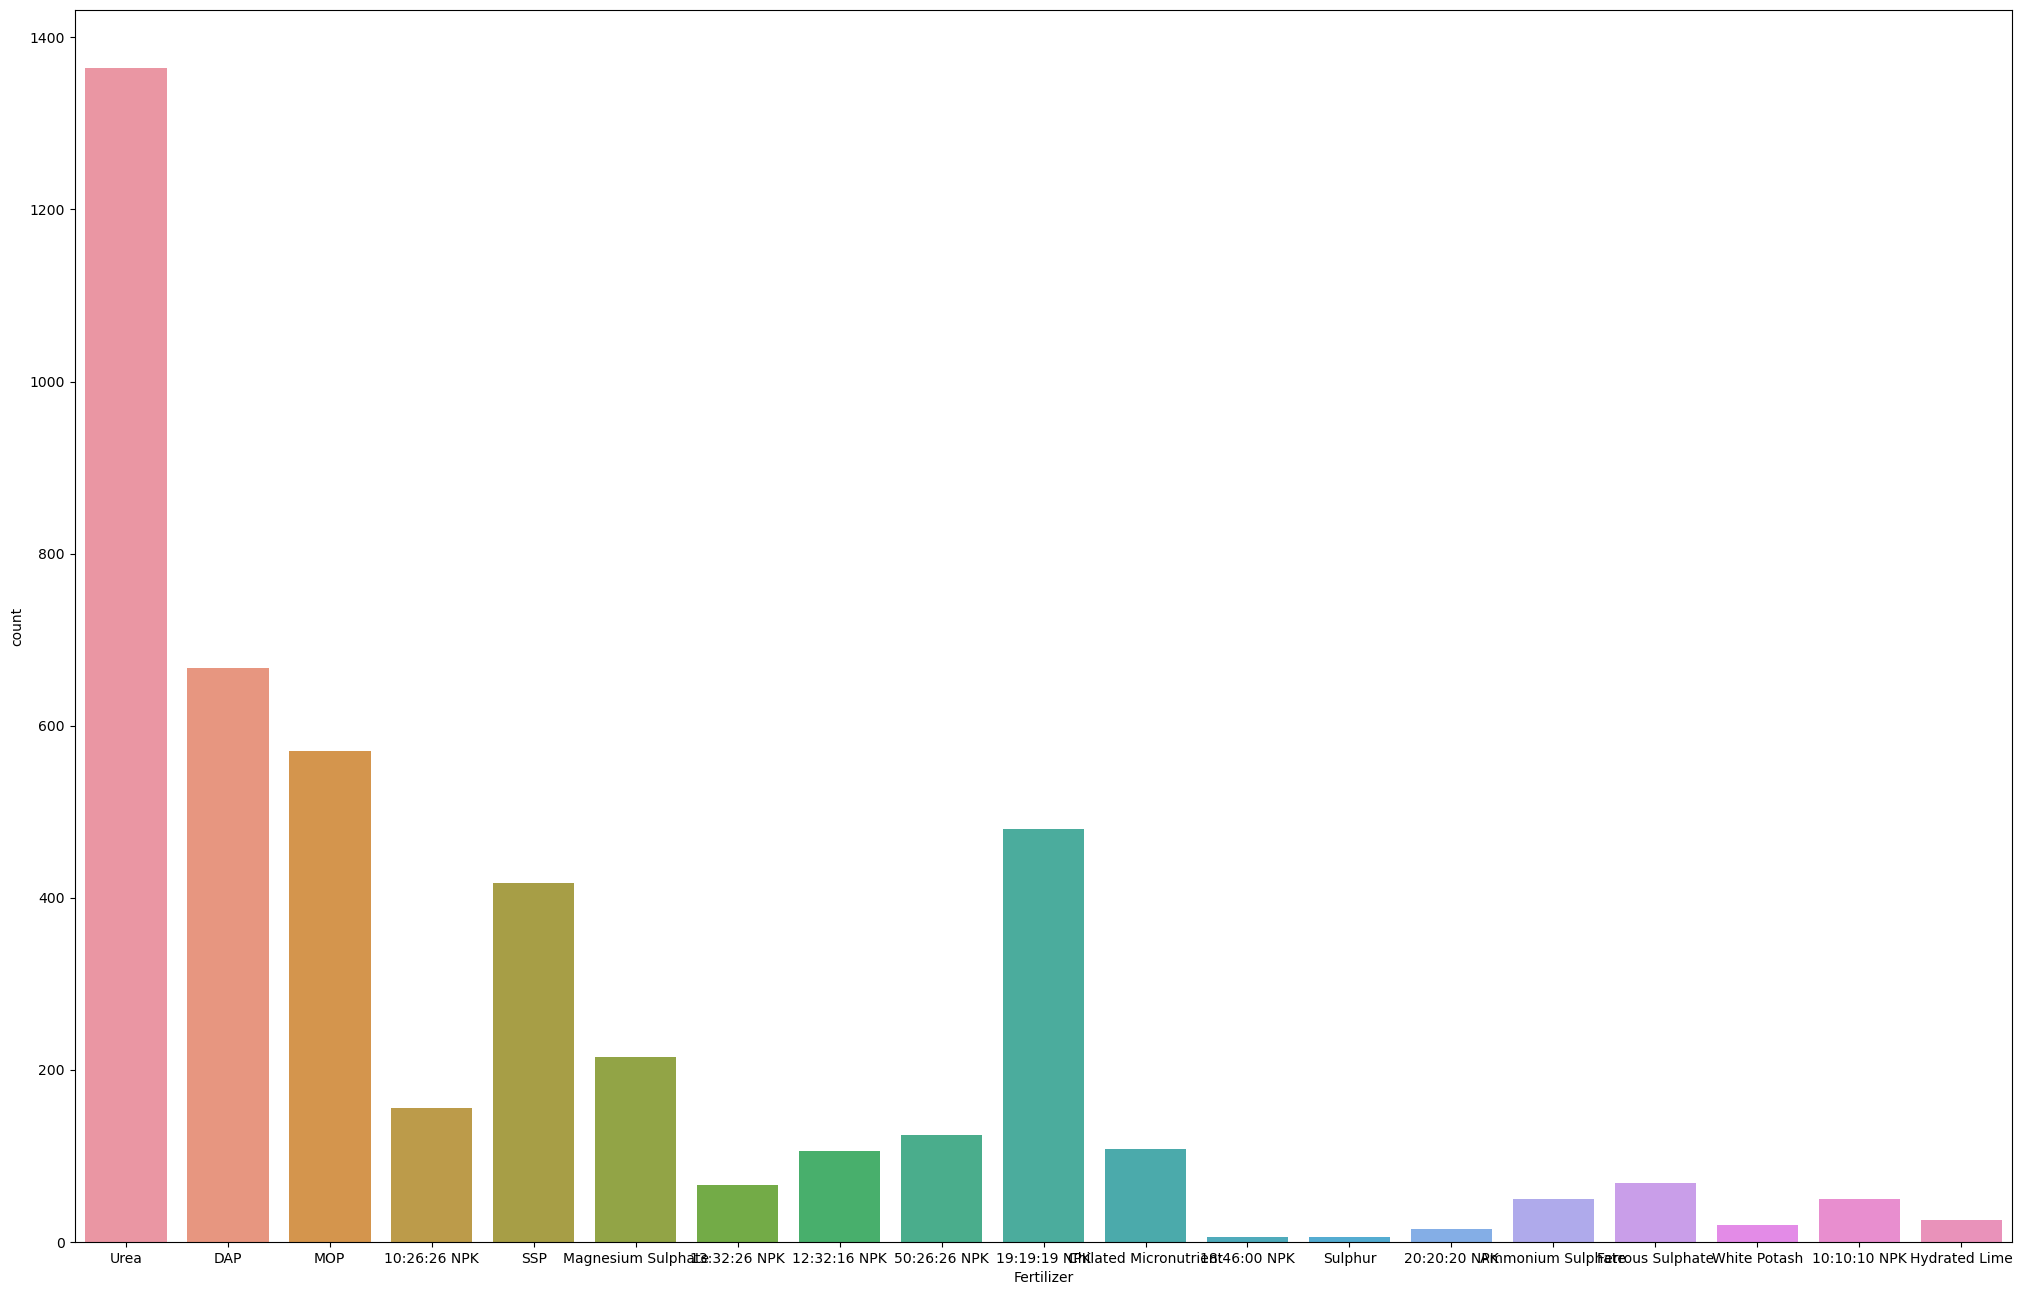

In [28]:
#CHECKING THE WEIGHTAGE OF EACH OF THE FERTILISER USED
#USING COUNTPLOT

plt.figure(figsize = (25,16))
sns.countplot(x = 'Fertilizer' , data = df_cap)

UREA IS THE MOST USED FERTILISER USED BY THE FARMERS.

([<matplotlib.patches.Wedge at 0x20c319cb430>,
 [Text(0.5985355310119493, 0.922905855500031, 'Kolhapur'),
  Text(-0.9882964734046039, 0.4829804143606892, 'Solapur'),
  Text(-0.7126881896150918, -0.8378994834603749, 'Satara'),
  Text(0.4402405405178315, -1.0080616382367538, 'Sangli'),
  Text(1.0394136234799793, -0.36002683139485603, 'Pune')],
 [Text(0.32647392600651776, 0.5034031939091077, '31.69%'),
  Text(-0.5390708036752384, 0.2634438623785577, '22.16%'),
  Text(-0.3887390125173228, -0.4570360818874772, '19.88%'),
  Text(0.24013120391881715, -0.5498518026745929, '15.67%'),
  Text(0.566952885534534, -0.19637827166992147, '10.61%')])

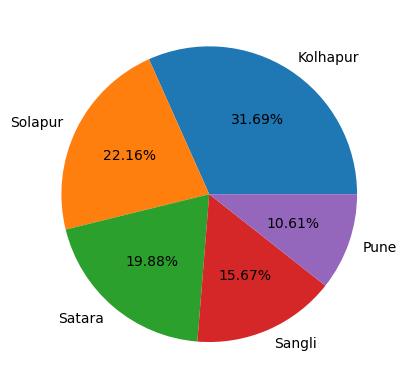

In [29]:
#CHECKING ABOUT WHICH PLACE DOES THIS DATASET CONTAIN MOST OF THE INFORMATIO
#USING PIECHART


Name = ['Kolhapur', 'Solapur', 'Satara', 'Sangli', 'Pune']
no = [1430,1000,897,707,479]
plt.pie( no , labels = Name , autopct = "%0.2f%%")

MAJORITY OF ROWS HAVE 'KOLHAPUR' AS DISRICT NAME.KOLHAPUR HAS DIFFERENT TYPES OF SOILS AT DIFFERENT LOCATIONS.

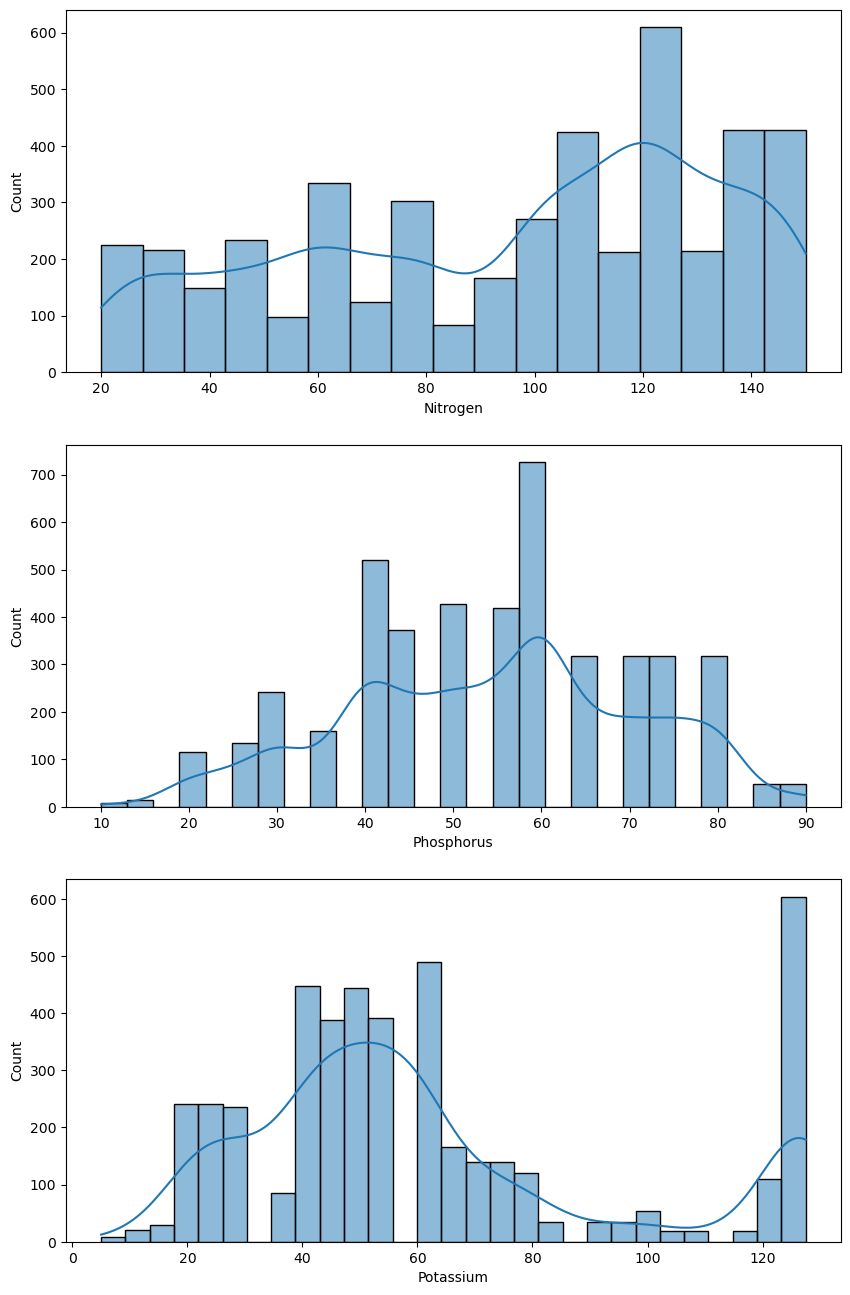

In [30]:
#CHECKING THE DISTRIBUTION OF EACH MINERAL IN THE SOIL
#USING HISTPLOT

soil_condition = ['Nitrogen' , 'Phosphorus' , 'Potassium']


plt.figure(figsize = (10,16))
for i,var in enumerate(soil_condition):
    plt.subplot(3,1,i+1)
    sns.histplot(x = var , data = df_cap , kde  = True)

FROM THESE THREE GRAPHS IT IS CONCLUDED THAT 'NITROGEN' , 'PHOSPHORUS' AND 'POTASSIUM' ARE THE MAIN COMPONENTS OF THE SOIL FERTILIZER.NITROGEN IS USED BY PLANTS FOR LOTS OF LEAF GROWTH AND GOOD GREEN COLOR.PHOSPHOROUS IS USED BY PLANTS TO HELP TO FORM NEW ROOTS.POTASSIUM HELPS PLANTS TO MAKE STRONG STEMS AND FOR GOOD GROWTH.

# ENCODING (CATEGORICAL TO NUMERICAL)

In [31]:
#LISTING OUT THE CATEGORICAL FEATURES


cat_var = df_cap.select_dtypes(include=['O']).keys()
cat_var

Index(['District_Name', 'Soil_color', 'Crop', 'Fertilizer'], dtype='object')

In [32]:
#LABEL ENCODING ALL THE FEATURES

cat_var = ['District_Name', 'Soil_color', 'Crop', 'Fertilizer']
le = LabelEncoder()

for i in cat_var:
    le.fit(df_cap[i])
    df_cap[i]=le.transform(df_cap[i])
    print(i , df_cap[i].unique())

District_Name [0 4 3 2 1]
Soil_color [0 5 3 1 4 2 6]
Crop [11  5  0  9 15  4  6 12 14  8  2  7 10  1 13  3]
Fertilizer [17 10 13  1 15 14  3  2  7  5  9  4 16  6  8 11 18  0 12]


In [33]:
#CHECKING THE HEAD VALUES

df_cap.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,0,0,75,50,5.0,6.5,1000,20,11,17
1,0,0,80,50,5.0,6.5,1000,20,11,17
2,0,0,85,50,5.0,6.5,1000,20,11,17
3,0,0,90,50,5.0,6.5,1000,20,11,17
4,0,0,95,50,5.0,6.5,1000,20,11,17


In [34]:
#CHECKING THE DATATYPE AFTER ENCODING

df_cap.dtypes

District_Name      int32
Soil_color         int32
Nitrogen           int64
Phosphorus         int64
Potassium        float64
pH               float64
Rainfall           int64
Temperature        int64
Crop               int32
Fertilizer         int32
dtype: object

ALL THE FEATURES ARE OF NUMERICAL DATAYPES.HENCE , WE HAVE SUCCESSFULLY PERFORMED ENCODING!!

# FEATURE SCALING

In [35]:
df_cap.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,0,0,75,50,5.0,6.5,1000,20,11,17
1,0,0,80,50,5.0,6.5,1000,20,11,17
2,0,0,85,50,5.0,6.5,1000,20,11,17
3,0,0,90,50,5.0,6.5,1000,20,11,17
4,0,0,95,50,5.0,6.5,1000,20,11,17


In [36]:
#SPLITTING INTO X MATRIX AND y VECTOR
#DROPPING THE "troponin" FEATURE

X = df_cap.drop(columns=['Fertilizer'],axis=1)
y = df_cap['Fertilizer']

In [37]:
#CHECKING THE FEATURES IN X MATRIX


X.columns.values

array(['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus',
       'Potassium', 'pH', 'Rainfall', 'Temperature', 'Crop'], dtype=object)

In [38]:
#PRINTING THE SHAPE OF (X-MATRIX) AND (y-VECTOR)

print("shape of X :",X.shape )
print("shape of y :",y.shape )

shape of X : (4513, 9)
shape of y : (4513,)


In [39]:
#SPLITTING  THE DATA IN TRAIN AND TEST

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=52)

print('shape of X_train : ', X_train.shape)
print('shape of X_test : ', X_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of X_train :  (3159, 9)
shape of X_test :  (1354, 9)
shape of y_train :  (3159,)
shape of y_test :  (1354,)


# FEATURE SELECTION

In [40]:
#GETTING THE CORRELATION MATRIX


cor = X_train.corr()
cor

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
District_Name,1.000000,-0.214701,-0.123348,0.030192,0.147223,0.083732,-0.065051,0.019143,0.083388
Soil_color,-0.214701,1.000000,0.063355,-0.025184,-0.146407,-0.026886,0.049052,0.129492,-0.218251
Nitrogen,-0.123348,0.063355,1.000000,0.713145,-0.049576,0.189036,0.261305,-0.011796,0.039693
Phosphorus,0.030192,-0.025184,0.713145,1.000000,-0.008507,0.237050,0.219486,-0.049680,0.077970
Potassium,0.147223,-0.146407,-0.049576,-0.008507,1.000000,-0.072054,0.185864,0.028374,0.167902
pH,0.083732,-0.026886,0.189036,0.237050,-0.072054,1.000000,0.099945,-0.005094,-0.016601
Rainfall,-0.065051,0.049052,0.261305,0.219486,0.185864,0.099945,1.000000,0.312978,0.052077
Temperature,0.019143,0.129492,-0.011796,-0.049680,0.028374,-0.005094,0.312978,1.000000,-0.330589
Crop,0.083388,-0.218251,0.039693,0.077970,0.167902,-0.016601,0.052077,-0.330589,1.000000


Text(108.08159722222221, 0.5, 'FEATURES')

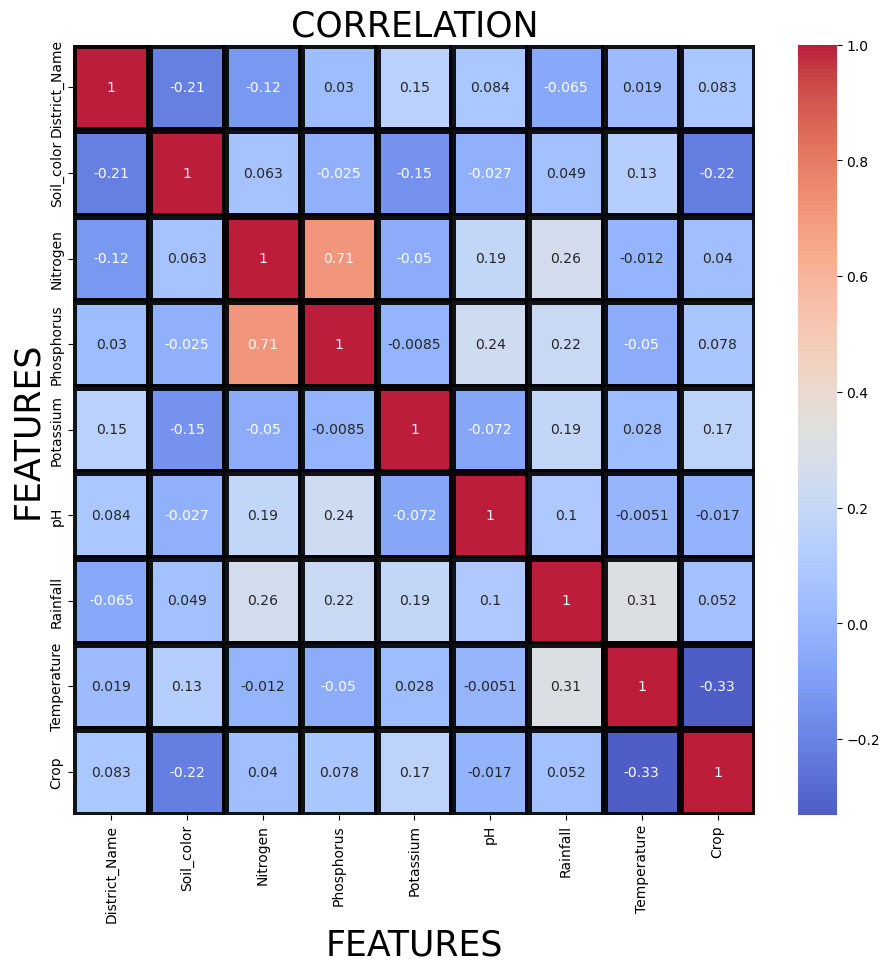

In [41]:
#GETTING THE CORRELATION OF ALL THE FEATURES EXCEPT THE TARGET FEATURE

plt.figure(figsize=(11,10))
sns.heatmap(cor,annot = True,linewidth = 5,linecolor='k',alpha=0.9,cbar_kws={"shrink":1},cmap='coolwarm')
plt.title("CORRELATION",fontsize = 25,color='k')
plt.xlabel("FEATURES",fontsize = 25,color = 'k')
plt.ylabel("FEATURES",fontsize = 25,color = 'k')

In [42]:
#with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature


def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr



drop_feature = correlation(X_train , 0.8)
drop_feature

set()

In [43]:
#SELECTING THE FEATURE USING MUTUAL INFORMATION GAIN


mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.20756236, 0.43335585, 0.46306703, 0.21733601, 0.72875239,
       0.08938652, 0.2652683 , 0.17172496, 1.23265329])

In [44]:
#SEARCHING FOR THE FEATURE

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Crop             1.232653
Potassium        0.728752
Nitrogen         0.463067
Soil_color       0.433356
Rainfall         0.265268
Phosphorus       0.217336
District_Name    0.207562
Temperature      0.171725
pH               0.089387
dtype: float64

<AxesSubplot:>

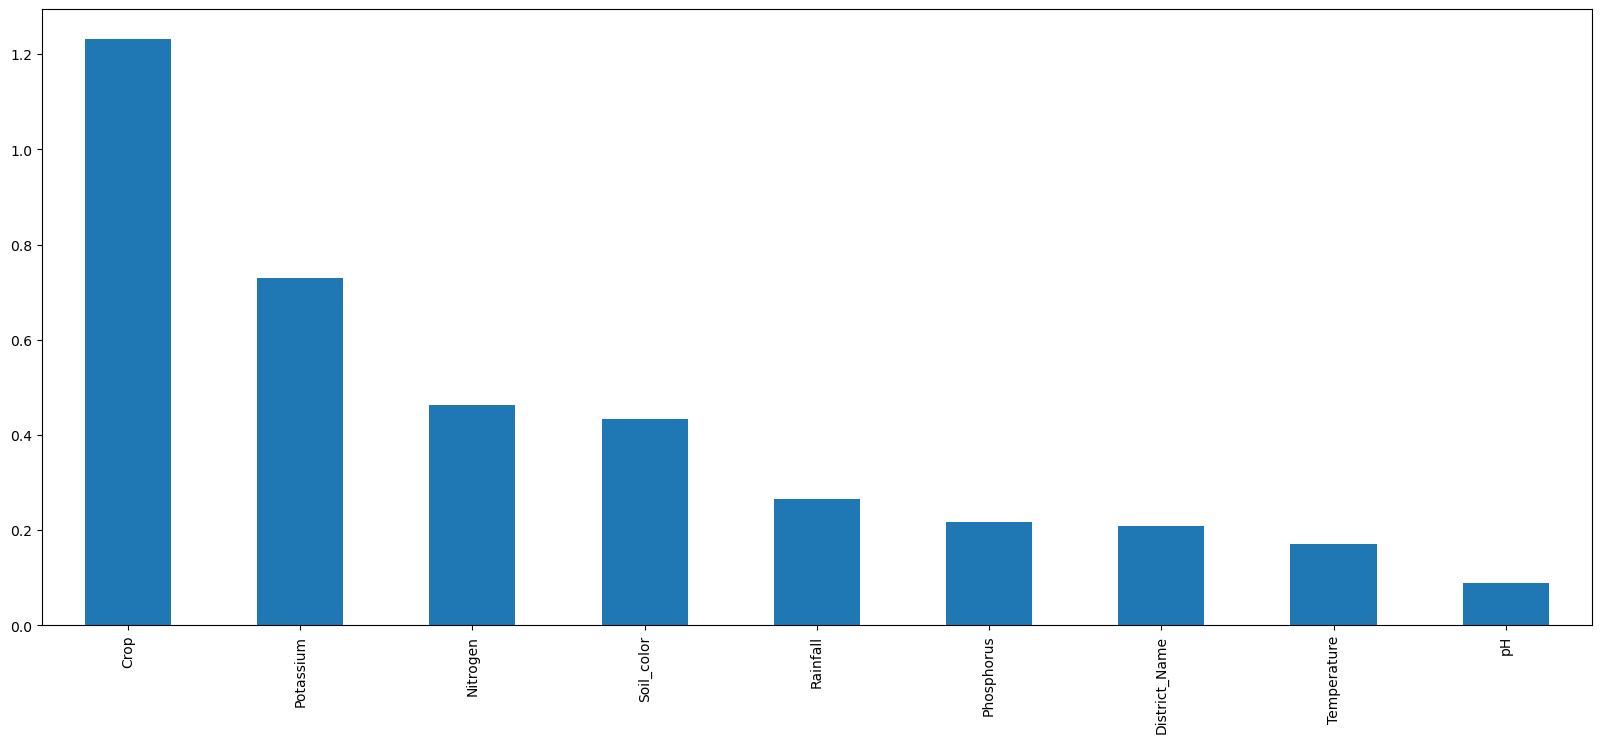

In [45]:
#let's plot the ordered mutual_info values per feature


mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [46]:
#No we Will select the  top 5 important features

sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Soil_color', 'Nitrogen', 'Potassium', 'Rainfall', 'Crop'], dtype='object')

In [47]:
#NEW X_TRAIN WITH THE SELECTED FEATURES

X_train = X_train[['Soil_color', 'Nitrogen', 'Potassium', 'Rainfall', 'Crop']]

In [48]:
#CHECKING THE HEAD VALUES

X_train.head()

,Soil_color,Nitrogen,Potassium,Rainfall,Crop
3706,0,120,100.0,800,15
3342,4,80,75.0,700,3
773,1,100,30.0,900,15
3326,4,100,70.0,700,3
3120,0,75,65.0,500,15


In [49]:
#NEW X_TEST WITH THE SELECTED FEATURES

X_test = X_test[['Soil_color', 'Nitrogen', 'Potassium', 'Rainfall', 'Crop']]

In [50]:
#GETTING THE SHAPES


print('shape of X_train : ', X_train.shape)
print('shape of X_test : ', X_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of X_train :  (3159, 5)
shape of X_test :  (1354, 5)
shape of y_train :  (3159,)
shape of y_test :  (1354,)


# FEATURE SELECTION

In [51]:
#STANDARDISATION

sc = StandardScaler()
sc.fit(X_train)

#TRANSFORMING THE DATASETS

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [52]:
#CALLING THE ARRAY

X_train_sc

array([[-0.81144649,  0.65120248,  1.15387312, -0.07493629,  1.30830811],
       [ 1.04136122, -0.40024073,  0.38899877, -0.46947585, -1.0258101 ],
       [-0.34824456,  0.12548088, -0.98777505,  0.31960327,  1.30830811],
       ...,
       [-0.81144649, -1.71454473,  1.99523491,  0.31960327, -1.22031995],
       [-0.81144649,  0.91406328, -0.06992583,  0.31960327,  0.5302687 ],
       [ 1.04136122, -0.92596233, -0.52885044, -1.25855498,  1.30830811]])

In [53]:
#CONVERTING THE ARRAY INTO DATAFRAME

X_train_sc = pd.DataFrame(X_train_sc,columns = ['Soil_color', 'Nitrogen', 'Potassium', 'Rainfall', 'Crop'])


X_test_sc = pd.DataFrame(X_test_sc,columns =['Soil_color', 'Nitrogen', 'Potassium', 'Rainfall', 'Crop'])

In [54]:
#REDUCING THE VALUES UPTO 2 DECIMAL COUNTS

X_train_sc.describe().round(2)

,Soil_color,Nitrogen,Potassium,Rainfall,Crop
count,3159.00,3159.00,3159.00,3159.00,3159.00
mean,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-0.81,-1.98,-1.75,-2.05,-1.61
25%,-0.81,-0.93,-0.68,-0.86,-0.83
50%,-0.81,0.26,-0.22,-0.07,0.14
75%,1.04,0.78,0.39,0.71,0.72
max,1.97,1.44,2.00,3.48,1.31


WE HAVE SUCCESSFULLY PERFORMED STANDARDISATION!!